### Como ler os dados e inspecionar o cabeçalho.

In [65]:
df <- read.delim('yasmin_rlongformat.tsv', check.names = FALSE, stringsAsFactors = TRUE)
head(df)

,ug/mL,viabilidade,metodo,linhagem
,<dbl>,<dbl>,<fct>,<fct>
1,1,106.79,hlp_ge,hff1
2,1,104.92,hlp_ge,hff1
3,1,104.67,hlp_ge,hff1
4,2,99.00,hlp_ge,hff1
5,2,95.12,hlp_ge,hff1
6,2,99.34,hlp_ge,hff1


In [66]:
df[df['linhagem']=='hff1',]

,ug/mL,viabilidade,metodo,linhagem
,<dbl>,<dbl>,<fct>,<fct>
1,1,106.79,hlp_ge,hff1
2,1,104.92,hlp_ge,hff1
3,1,104.67,hlp_ge,hff1
4,2,99.00,hlp_ge,hff1
5,2,95.12,hlp_ge,hff1
6,2,99.34,hlp_ge,hff1
7,3,98.53,hlp_ge,hff1
8,3,96.53,hlp_ge,hff1
9,3,97.87,hlp_ge,hff1


### Criar o diagrama de caixa (box plot) para os dois métodos em uma linhagem específica.

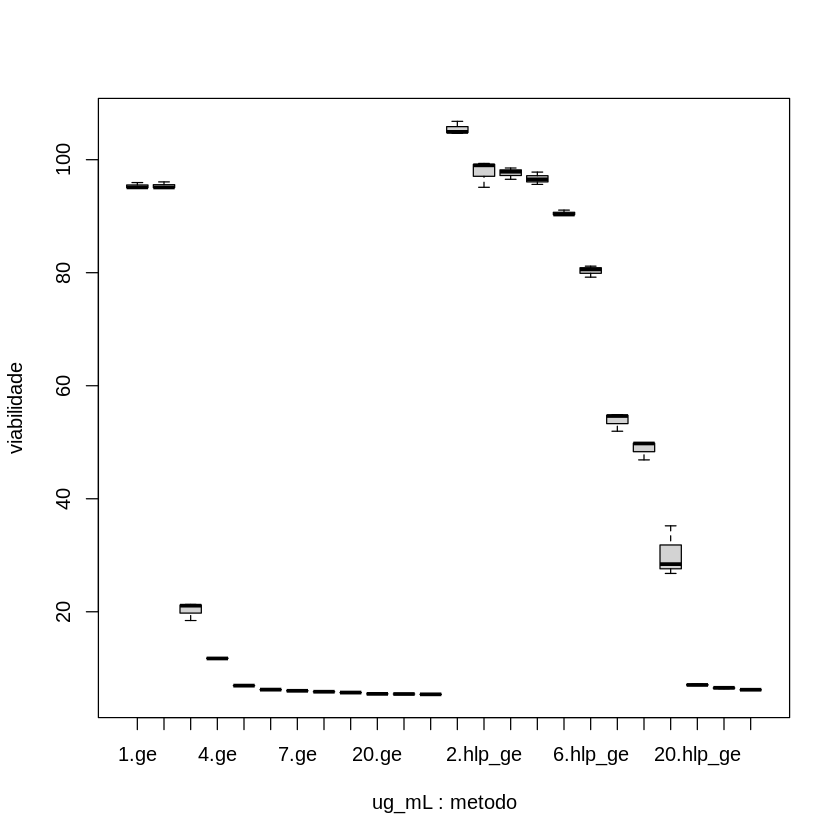

In [68]:
colnames(df)[1] <- 'ug_mL'
df$ug_mL <- as.factor(df$ug_mL)
boxplot(viabilidade ~  ug_mL * metodo, data = df[df['linhagem']=='hff1',])

### Criar um diagram de interação. Graficamente parece não haver interação, aconteceria, por exemplo, se para uma concetração menor para um determinado método resultasse em maior viabilidade que outro método com uma concentração maior, mas aqui, aparentemente os dois métodos seguem uma resposta dependente da dose.

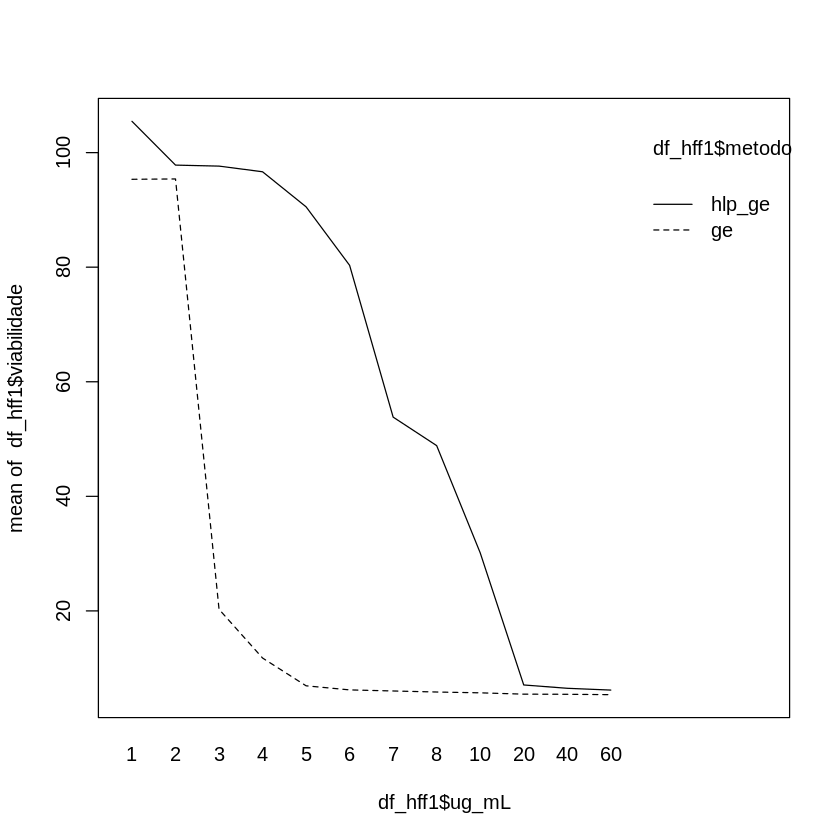

In [69]:
df_hff1 = df[df['linhagem']=='hff1',]
interaction.plot(df_hff1$ug_mL, df_hff1$metodo, df_hff1$viabilidade)

### Como subselecionar em uma tabela os valores de viabilidade para um método e uma contração específicas.

In [70]:
df_hff1[df_hff1$metodo=='hlp_ge' & df_hff1$ug_mL==1, 'viabilidade']

[1] 106.79 104.92 104.67

### Quando não rejeitamos a hipótese de nulidade para distribuição normal, assumimos que nossos dados se assemelham a uma distribuição normal. Aparentemente os dados se ajustam a uma distribuição normal, mas a amostra é muito pequena, devemos ter cautela.

In [5]:
?shapiro.test

In [71]:
# Validação de pressupostos
# Normalidade
# https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test
shapiro.test(df_hff1[df_hff1$metodo=='hlp_ge' & df_hff1$ug_mL==1, 'viabilidade'])


	Shapiro-Wilk normality test

data:  df_hff1[df_hff1$metodo == "hlp_ge" & df_hff1$ug_mL == 1, "viabilidade"]
W = 0.83707, p-value = 0.2065


### Mesmo racional para homogeneidade de variâncias. Aqui fica mais complicado, pois são muitos grupos, e para alguns há variabilidade diferente, então esse pressuposto não é atendido. De qualquer forma podemos inspecionar os resultados da análise de variância como uma evidência preliminar.

In [14]:
# Homogeneidade:
#https://en.wikipedia.org/wiki/Bartlett%27s_test
?bartlett.test

In [72]:
df_hff1[df_hff1$ug_mL==1,]

,ug_mL,viabilidade,metodo,linhagem
,<fct>,<dbl>,<fct>,<fct>
1,1,106.79,hlp_ge,hff1
2,1,104.92,hlp_ge,hff1
3,1,104.67,hlp_ge,hff1
73,1,94.98,ge,hff1
74,1,95.95,ge,hff1
75,1,95.10,ge,hff1


In [73]:
length(unique(df_hff1$ug_mL))

[1] 12

In [74]:
length(rep(1:24, each=3))

[1] 72

In [75]:
dim(df_hff1)

[1] 72  4

In [76]:
df_hff1$rep <- rep(1:24, each=3)
head(df_hff1)

,ug_mL,viabilidade,metodo,linhagem,rep
,<fct>,<dbl>,<fct>,<fct>,<int>
1,1,106.79,hlp_ge,hff1,1
2,1,104.92,hlp_ge,hff1,1
3,1,104.67,hlp_ge,hff1,1
4,2,99.00,hlp_ge,hff1,2
5,2,95.12,hlp_ge,hff1,2
6,2,99.34,hlp_ge,hff1,2


In [77]:
bartlett.test(viabilidade ~ rep, data = df_hff1)


	Bartlett test of homogeneity of variances

data:  viabilidade by rep
Bartlett's K-squared = Inf, df = 23, p-value < 2.2e-16


In [78]:
bartlett.test(viabilidade ~ rep, data = df_hff1[df_hff1$metodo=='hlp_ge',])


	Bartlett test of homogeneity of variances

data:  viabilidade by rep
Bartlett's K-squared = 38.715, df = 11, p-value = 5.922e-05


### A anova para dois fatores indica que o método utilizado (hlp_ge e ge, a concentração, bem como a interação entre os dois são significativos. Como visto graficamente, não temos evidência forte de interação.

In [79]:
anova(lm(viabilidade ~  ug_mL * metodo,data=df_hff1))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
ug_mL,11,70184.85617,6380.441470,3925.171,6.194409e-67
metodo,1,25447.30400,25447.304001,15654.875,5.081422e-62
ug_mL:metodo,11,20327.66118,1847.969198,1136.848,4.723800e-54
Residuals,48,78.02493,1.625519,NA,NA


### Fazer o teste de Tukey para todas as concentrações dentro de cada método.

In [80]:
df_hff1$ug_mL <- as.factor(df_hff1$ug_mL)

In [81]:
TukeyHSD(aov(lm(viabilidade~ug_mL,data=df_hff1[df_hff1$metodo=='hlp_ge',])))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = lm(viabilidade ~ ug_mL, data = df_hff1[df_hff1$metodo == "hlp_ge", ]))

$ug_mL
             diff         lwr         upr     p adj
2-1    -7.6400000  -12.729681  -2.5503194 0.0007259
3-1    -7.8166667  -12.906347  -2.7269861 0.0005367
4-1    -8.8066667  -13.896347  -3.7169861 0.0001000
5-1   -14.9266667  -20.016347  -9.8369861 0.0000000
6-1   -25.1400000  -30.229681 -20.0503194 0.0000000
7-1   -51.6333333  -56.723014 -46.5436528 0.0000000
8-1   -56.6100000  -61.699681 -51.5203194 0.0000000
10-1  -75.3200000  -80.409681 -70.2303194 0.0000000
20-1  -98.3866667 -103.476347 -93.2969861 0.0000000
40-1  -98.9666667 -104.056347 -93.8769861 0.0000000
60-1  -99.2800000 -104.369681 -94.1903194 0.0000000
3-2    -0.1766667   -5.266347   4.9130139 1.0000000
4-2    -1.1666667   -6.256347   3.9230139 0.9992831
5-2    -7.2866667  -12.376347  -2.1969861 0.0013286
6-2   -17.5000000  -22.589681 -12.4103194 0.00

In [82]:
TukeyHSD(aov(lm(viabilidade~ug_mL,data=df_hff1[df_hff1$metodo=='ge',])))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = lm(viabilidade ~ ug_mL, data = df_hff1[df_hff1$metodo == "ge", ]))

$ug_mL
              diff        lwr          upr     p adj
2-1     0.05666667  -1.450662   1.56399572 1.0000000
3-1   -75.06666667 -76.573996 -73.55933762 0.0000000
4-1   -83.57000000 -85.077329 -82.06267095 0.0000000
5-1   -88.41666667 -89.923996 -86.90933762 0.0000000
6-1   -89.13000000 -90.637329 -87.62267095 0.0000000
7-1   -89.32000000 -90.827329 -87.81267095 0.0000000
8-1   -89.50000000 -91.007329 -87.99267095 0.0000000
10-1  -89.64333333 -91.150662 -88.13600428 0.0000000
20-1  -89.87333333 -91.380662 -88.36600428 0.0000000
40-1  -89.89666667 -91.403996 -88.38933762 0.0000000
60-1  -89.96333333 -91.470662 -88.45600428 0.0000000
3-2   -75.12333333 -76.630662 -73.61600428 0.0000000
4-2   -83.62666667 -85.133996 -82.11933762 0.0000000
5-2   -88.47333333 -89.980662 -86.96600428 0.0000000
6-2   -89.18666667 -90.693996 -87.6

### Fazer todas as comparações entre os métodos dentro da mesma concentração.

In [18]:
?t.test

In [83]:
df_hff1[df_hff1$metodo=='ge' & df_hff1$ug_mL==1,]

,ug_mL,viabilidade,metodo,linhagem,rep
,<fct>,<dbl>,<fct>,<fct>,<int>
73,1,94.98,ge,hff1,13
74,1,95.95,ge,hff1,13
75,1,95.10,ge,hff1,13


In [84]:
t.test(df_hff1[df_hff1$metodo=='ge' & df_hff1$ug_mL==1,'viabilidade'],
       df_hff1[df_hff1$metodo=='hlp_ge' & df_hff1$ug_mL==1,'viabilidade'])


	Welch Two Sample t-test

data:  df_hff1[df_hff1$metodo == "ge" & df_hff1$ug_mL == 1, "viabilidade"] and df_hff1[df_hff1$metodo == "hlp_ge" & df_hff1$ug_mL == 1, "viabilidade"]
t = -13.759, df = 2.7986, p-value = 0.001181
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -12.554865  -7.678469
sample estimates:
mean of x mean of y 
 95.34333 105.46000 


In [85]:
t.test(df_hff1[df_hff1$metodo=='ge' & df_hff1$ug_mL==60,'viabilidade'],
       df_hff1[df_hff1$metodo=='hlp_ge' & df_hff1$ug_mL==60,'viabilidade'])


	Welch Two Sample t-test

data:  df_hff1[df_hff1$metodo == "ge" & df_hff1$ug_mL == 60, "viabilidade"] and df_hff1[df_hff1$metodo == "hlp_ge" & df_hff1$ug_mL == 60, "viabilidade"]
t = -24.121, df = 3.7231, p-value = 3.158e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8948494 -0.7051506
sample estimates:
mean of x mean of y 
     5.38      6.18 


In [86]:
pvals <- c()
for (x in unique(df_hff1$ug_mL)){

  pvals <- append(pvals, t.test(df_hff1[df_hff1$metodo=='ge' & df_hff1$ug_mL==x,'viabilidade'],
                  df_hff1[df_hff1$metodo=='hlp_ge' & df_hff1$ug_mL==x,'viabilidade'])[[3]])

}

In [87]:
pvals

[1] 1.181090e-03 2.109633e-01 1.568962e-06 5.150510e-05 9.690075e-06
 [6] 6.012469e-05 3.843080e-04 5.227707e-04 1.095296e-02 2.072541e-03
[11] 1.778949e-03 3.157866e-05

In [37]:
?p.adjust

In [88]:
comparisons <- cbind(as.numeric(as.character(unique(df_hff1$ug_mL))),
                     'hlp_ge', 'ge', pvals, p.adjust(pvals, method='fdr'))
comparisons

,,,pvals,
1,hlp_ge,ge,0.00118109010100365,0.00177163515150548
2,hlp_ge,ge,0.210963336805429,0.210963336805429
3,hlp_ge,ge,1.56896154435775e-06,1.8827538532293e-05
4,hlp_ge,ge,5.15051003617033e-05,0.000144299257295525
5,hlp_ge,ge,9.69007547600298e-06,5.81404528560179e-05
6,hlp_ge,ge,6.01246905398019e-05,0.000144299257295525
7,hlp_ge,ge,0.000384308040681653,0.000768616081363306
8,hlp_ge,ge,0.000522770705772431,0.000896178352752739
10,hlp_ge,ge,0.0109529627287619,0.0119486866131948
20,hlp_ge,ge,0.00207254108802197,0.00248704930562636


### Fazer anova com 3 fatores, incluindo linhagem celular.

In [89]:
anova(lm(viabilidade ~  ug_mL * metodo * linhagem,data=df))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
ug_mL,11,167427.55941,15220.687219,4784.76318,2.769418e-126
metodo,1,19888.75576,19888.755756,6252.21351,3.424998e-89
linhagem,1,71.64212,71.642117,22.52136,7.241822e-06
ug_mL:metodo,11,16668.50614,1515.318740,476.35440,1.456476e-78
ug_mL:linhagem,11,6001.02884,545.548076,171.49806,5.533932e-58
metodo:linhagem,1,7152.22585,7152.225851,2248.36806,2.024625e-68
ug_mL:metodo:linhagem,11,7166.61861,651.510783,204.80841,1.670066e-61
Residuals,96,305.38313,3.181074,NA,NA
